In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("../HW02/S02-hw-dataset.csv")
dataset.head()


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [3]:
dataset.tail()

,user_id,age,country,purchases,revenue
36,37,18.0,DE,4,1104
37,38,35.0,DE,3,738
38,39,39.0,FR,7,1162
39,40,34.0,RU,7,2086
40,10,24.0,RU,7,511


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
dataset.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [29]:
dataset.count()

user_id      41
age          39
country      41
purchases    41
revenue      41
dtype: int64

In [6]:
dataset.isna().mean()
#Считаем долю пропусков в каждом столбце

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [100]:
dataset.duplicated()
c = 0

dumb = []

for i in range(len(dataset)):
    if dataset.duplicated()[i] == np.True_:
        c +=1
        print(dataset.iloc[i].to_frame().T)
        if i not in dumb:
            dumb.append(i)
c
#Количество дубликатов



   user_id   age country purchases revenue category
40      10  24.0      RU         7     511      low


1

In [101]:
dumb

[40]

In [110]:
mask = (dataset['age'] > 100) | (dataset['age'] < 18)
for i in dataset[mask].index:
        if i not in dumb:
            dumb.append(i)
dumb

[40, 5, 20]

In [111]:
mask = (dataset['age'] > 100) | (dataset['age'] < 18)
print("Подозрительный возраст: \n",dataset[mask])
for i in dataset[mask].index:
        if i not in dumb:
            dumb.append(i)
mask = dataset['purchases'] < 0
print("Подозрительное количество покупок: \n",dataset[mask])
for i in dataset[mask].index:
        if i not in dumb:
            dumb.append(i)
mask = (dataset['purchases'] == 0) & (dataset['revenue'] > 0)
for i in dataset[mask].index:
        if i not in dumb:
            dumb.append(i)
print("Подозрительный возраст: \n",dataset[mask])
#Вывод подозрительных значений
dumb


Подозрительный возраст: 
     user_id    age country  purchases  revenue category
5         6  120.0      FR         -1      785   medium
20       21    5.0      RU          8     1488     high
Подозрительное количество покупок: 
    user_id    age country  purchases  revenue category
5        6  120.0      FR         -1      785   medium
Подозрительный возраст: 
 Empty DataFrame
Columns: [user_id, age, country, purchases, revenue, category]
Index: []


[40, 5, 20]

В датасете в двух строках отсутствует возраст,
также имеется 1 полный дубликат,
также имеется 2 строки, у которых подозрительный возраст, в одной из них отрицательное количество покупок

In [ ]:
c_group = dataset.groupby('country')
c_group.size()
#Группируем по странам

country
CN     2
DE     6
FR    12
RU    13
US     8
dtype: int64

In [30]:
c_group.count()

,user_id,age,purchases,revenue
country,,,,
CN,2,2,2,2
DE,6,5,6,6
FR,12,12,12,12
RU,13,13,13,13
US,8,7,8,8


In [25]:
dataset.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [33]:
print('Среднее по странам',c_group['revenue'].median(),'\n')
print('Общий доход по странам', c_group['revenue'].sum())

Среднее по странам country
CN    1054.0
DE    1200.0
FR     619.5
RU     650.0
US     537.5
Name: revenue, dtype: float64 

Общий доход по странам country
CN     2108
DE     8673
FR     8111
RU    10271
US     4459
Name: revenue, dtype: int64


In [58]:
len(dataset.columns)

6

In [ ]:
c = dataset['country'].unique()
c.size
data = np.empty(c.size, )

5

In [41]:
cutted = pd.cut(dataset['revenue'], bins = [0,600,1200,np.inf], labels = ['low','medium','high'])
dataset['category'] = cutted
dataset

,user_id,age,country,purchases,revenue,category
0,1,25.0,FR,7,749,medium
1,2,24.0,RU,5,1115,medium
2,3,52.0,FR,7,399,low
3,4,31.0,RU,6,654,medium
4,5,NaN,DE,6,1296,high
5,6,120.0,FR,-1,785,medium
6,7,46.0,RU,0,0,NaN
7,8,28.0,CN,2,456,low
8,9,39.0,US,4,980,medium
9,10,24.0,RU,7,511,low


In [68]:
r = dataset[dataset['country'] == 'RU']
r[['purchases','revenue']]

,purchases,revenue
1,5,1115
3,6,654
6,0,0
9,7,511
17,0,0
18,3,432
19,2,442
20,8,1488
24,5,650
26,6,1302


In [ ]:
countries = dataset['country'].unique()
country_datasets = {}


for country in countries:
    country_datasets[country] = dataset[(dataset['country'] == country) & (~dataset.index.isin(dumb))][['purchases','revenue']]
country_datasets['DE']


,purchases,revenue
4,6,1296
13,9,2358
23,11,2475
29,6,702
36,4,1104
37,3,738


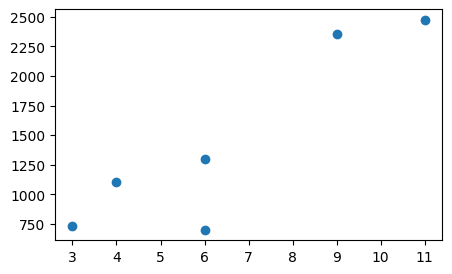

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(country_datasets['DE']['purchases'],country_datasets['DE']['revenue'])
plt.show()

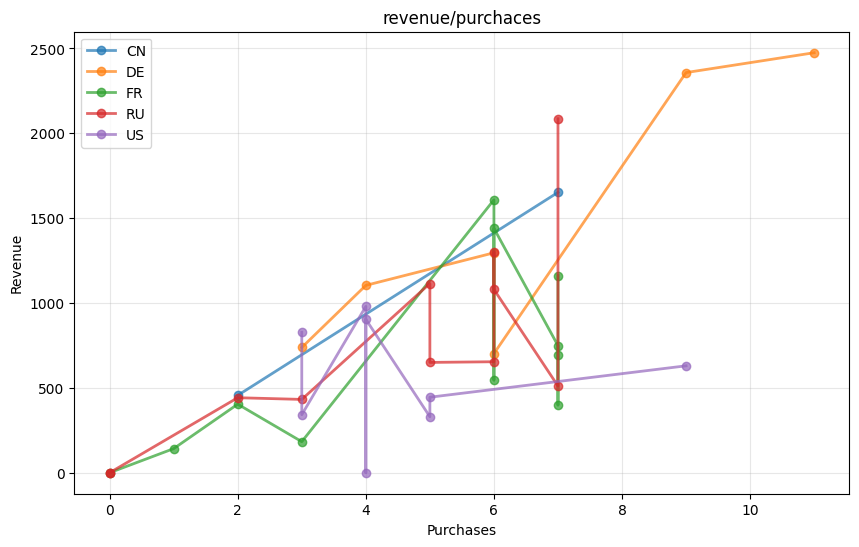

In [137]:
dataset = dataset.drop(i for i in dumb)
sorted = dataset.sort_values(['country','purchases'])
fig, ax = plt.subplots(figsize=(10,6))


for country, group in sorted.groupby('country'):
    group.plot(x='purchases',y='revenue',
    ax=ax,
    label=country,
    marker='o',
    linewidth=2,
    alpha=0.7)

ax.set_title('revenue/purchaces')
ax.set_xlabel('Purchases')
ax.set_ylabel('Revenue')
ax.grid(True, alpha=0.3)
plt.show()